# Analysis by Type of Beneficiary

data from: https://www.ssa.gov/oact/progdata/icp.html

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import Files and info

df_raw = pd.read_excel("SS_Data_by_Type_of_Beneficiary2.xlsx")

beneficiary_types_ls = [
    
    "Retired_Worker",
    "Spouse_of_Retired_Worker",
    "Child_of_Retired_Worker",
    "Child_of_Deceased_Worker",
    "Aged_Widower",
    "Young_Widower_With_Child_In_Care",
    "Disabled_Widower",
    "Parent_of_Deceased_Worker",
    "Disabled_Worker",
    "Spouse_of_Disabled_Worker",
    "Child_of_Disabled_Worker"]


In [46]:
df_raw.head()

,End of Month,Retired_Worker_Total_Amount,Retired_Worker_Total_Average_Amount,Retired_Worker_Male_Number,Retired_Worker_Male_Average_Amount,Retired_Worker_Male_Female_Number,Retired_Worker_Female_Average_Amount,Spouse_of_Retired_Worker_Total_Number,Spouse_of_Retired_Worker_Total_Average_Amount,Spouse_of_Retired_Worker_Male_Number,...,Spouse_Of_Disabled_Worker_Female_Number,Spouse_Of_Disabled_Worker_Female_Average_Amount,Child_Of_Disabled_Worker_Total_Number,Child_Of_Disabled_Worker_Total_Average_Amount,Child_Of_Disabled_Worker_Minor_Number,Child_Of_Disabled_Worker_Minor_Average_Amount,Child_Of_Disabled_Worker_Disabled_Number,Child_Of_Disabled_Worker_Disabled_Average_Amount,Child_Of_Disabled_Worker_Student_Number,Child_Of_Disabled_Worker_Student_Average_Amount
0,1967-01-01,11713055,84.55,7062629,93.49,4650426,70.98,2641331,43.90,11407,...,220669,34.54,659686,31.38,605746,30.31,10252,41.17,43688,43.93
1,1967-02-01,11730905,84.67,7071093,93.63,4659812,71.08,2639607,43.94,10137,...,221496,34.46,663373,31.37,607712,30.28,10318,41.22,45343,43.72
2,1967-03-01,11651066,84.70,7008957,93.69,4642109,71.13,2606117,43.94,9922,...,223169,34.36,672768,31.34,614285,30.22,10459,41.13,48024,43.51
3,1967-04-01,11705026,84.80,7043619,93.82,4661407,71.16,2625954,43.99,9940,...,222387,34.30,674502,31.35,614701,30.21,10593,41.08,49208,43.50
4,1967-05-01,11659549,84.88,7010336,93.92,4649213,71.26,2605526,44.03,9780,...,224726,34.21,685786,31.33,622867,30.16,10718,41.00,52201,43.30


In [114]:
df_ben_nums = pd.concat([df_raw.iloc[:, 0], df_raw.iloc[:, 1],df_raw.filter(like='Total_Number')], axis=1)
df_ben_nums['Total'] = df_ben_nums.iloc[:, 1:].sum(axis = 1)
df_percent = pd.concat(
    [df_raw.iloc[:, 0].reset_index(drop=True), 
     df_ben_nums.iloc[:, 1:].div(df_ben_nums['Total'], axis=0).reset_index(drop=True)],
    axis=1
)
df_percent.head()

,End of Month,Retired_Worker_Total_Amount,Spouse_of_Retired_Worker_Total_Number,Child_Of_Retired_Worker_Total_Number,Child_Of_Deceased_Worker_Total_Number,Aged_Widower_Total_Number,Young_Widower_With_Child_In_Care_Total_Number,Disabled_Widower_Total_Number,Parent_Of_Deceased_Worker_Total_Number,Disabled_Worker_Total_Number,Spouse_Of_Disabled_Worker_Total_Number,Child_Of_Disabled_Worker_Total_Number,Total
0,1967-01-01,0.527033,0.118848,0.023011,0.100349,0.117687,0.021894,0.0,0.001549,0.049995,0.009953,0.029683,1.0
1,1967-02-01,0.526693,0.118513,0.022935,0.100741,0.118042,0.021889,0.0,0.001541,0.049894,0.009968,0.029784,1.0
2,1967-03-01,0.524367,0.117291,0.023019,0.101884,0.119078,0.022050,0.0,0.001543,0.050424,0.010066,0.030279,1.0
3,1967-04-01,0.524419,0.117650,0.022924,0.102061,0.119016,0.021820,0.0,0.001530,0.050373,0.009986,0.030220,1.0
4,1967-05-01,0.522251,0.116706,0.023058,0.103294,0.119646,0.021907,0.0,0.001528,0.050804,0.010088,0.030718,1.0


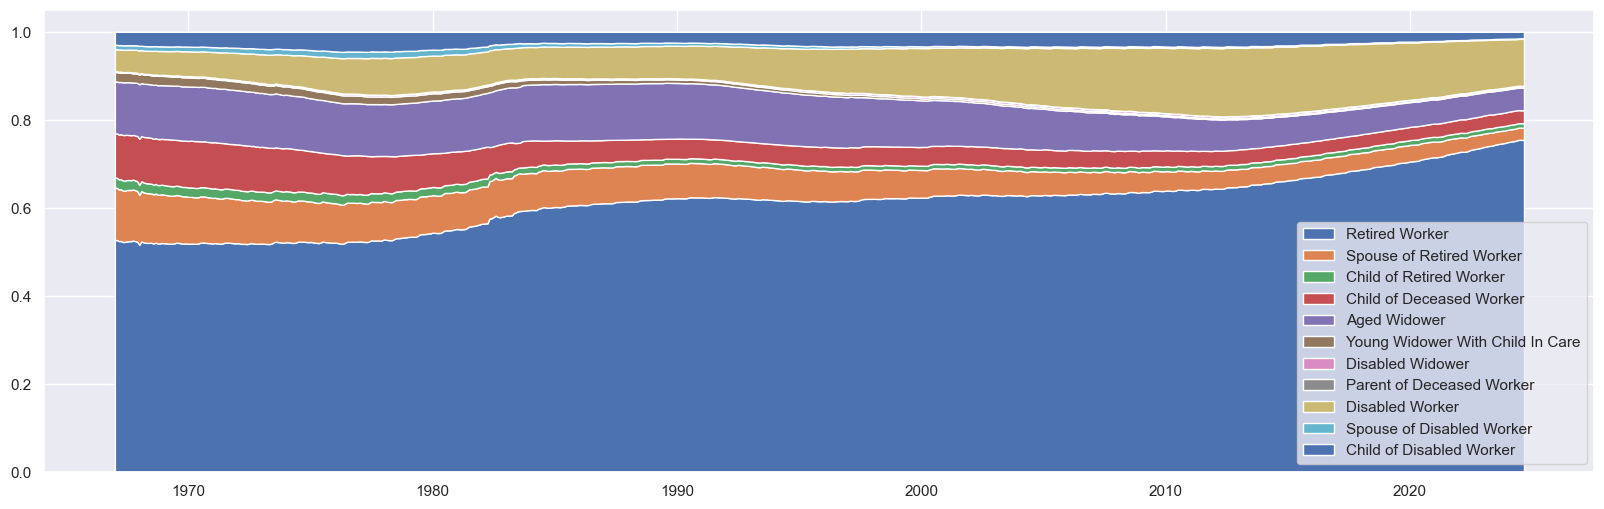

In [120]:
sns.set_theme()

y_columns = [
    "Retired_Worker_Total_Amount",
    "Spouse_of_Retired_Worker_Total_Number",
    "Child_Of_Retired_Worker_Total_Number",
    "Child_Of_Deceased_Worker_Total_Number",
    "Aged_Widower_Total_Number",
    "Young_Widower_With_Child_In_Care_Total_Number",
    "Disabled_Widower_Total_Number",
    "Parent_Of_Deceased_Worker_Total_Number",
    "Disabled_Worker_Total_Number",
    "Spouse_Of_Disabled_Worker_Total_Number",
    "Child_Of_Disabled_Worker_Total_Number"
]

legend_key = [ 
    "Retired Worker",
    "Spouse of Retired Worker",
    "Child of Retired Worker",
    "Child of Deceased Worker",
    "Aged Widower",
    "Young Widower With Child In Care",
    "Disabled Widower",
    "Parent of Deceased Worker",
    "Disabled Worker",
    "Spouse of Disabled Worker",
    "Child of Disabled Worker"]

plt.figure(figsize = (20, 6))


plt.stackplot(
    df_percent["End of Month"], 
    [df_percent[col] for col in y_columns]
)


plt.legend(legend_key, loc = 'lower right')

plt.show()

In [8]:
# function to extract data by type of worker

def extract_beneficiary_type(specified_beneficiary):
    x = df_raw.columns.str.startswith(specified_beneficiary) #gets the columns in an index with T and F
    x[0] = True #makes the date column from False to True
    df_return = df_raw[df_raw.columns[x]]
    return df_return


## Retired Worker Analysis

defined as "Retired worker—beneficiary who worked in covered employment long enough to be insured and who is at least 62 years old (benefits equal to the "primary insurance amount" are payable at the normal retirement age; maximum benefits are payable at age 70)"

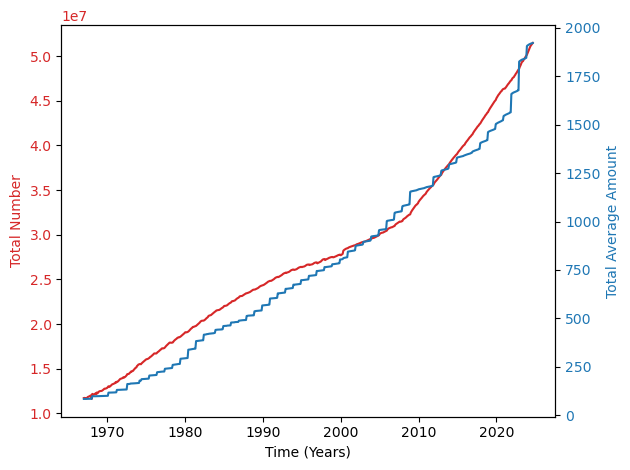

In [10]:
Retired_Worker_df = extract_beneficiary_type(beneficiary_types_ls[0])

time = Retired_Worker_df["End of Month"]
y1 = Retired_Worker_df["Retired_Worker_Total_Amount"]
y2 = Retired_Worker_df["Retired_Worker_Total_Average_Amount"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Total Number', color=color)
ax1.plot(time, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Total Average Amount', color=color)
ax2.plot(time, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

plt.show()